# Etapa 2
Na etapa 2 serão usados diferentes algoritmos de *unsupervisied learning*. Para tal foram realizadas metodos de redução de dimensionalidade e clustering.
Os métodos serão impletamentados sobre os 3 dataset gerados na etapa anterior. Estes métodos serão utilizados com o objetivo de agrupar caso de atributos similares ou encontrar padrões recorrentes nos datasets.

# Imports e carregamento do dataset
O primeiro passo foi a importação dos datasets e a importação de packages necessários à realização desta etapa. Ao longo desta etapa são utilizadas apenas as 100 features que obtiveram um melhor k score no processo de Feature Selection previamente realizado (as primeiras 100 colunas das features).
## Classificação Binária

In [1]:
import pandas as pd
df_Tra = pd.read_csv('df_Tra.csv', sep= ',')
df_Tra = df_Tra.drop(columns='Unnamed: 0')
print(df_Tra.groupby('transporter').size())
df_Tra = df_Tra.iloc[:,:102]
df_Tra

transporter
NonTra    16457
Tra       14048
dtype: int64


,sequence,transporter,bomanindex,_ChargeD2100,_HydrophobicityD3100,Gravy,_HydrophobicityD1100,_ChargeC2,_SolventAccessibilityD2100,_ChargeD2075,...,LF,W,_SecondaryStrD1100,_ChargeD1025,PAAC18,APAAC9,R,_SecondaryStrC1,APAAC2,LL
0,MSYKPIAPAPSSTPGSSTPGPGTPVPTGSVPSPSGSVPGAGAPFRP...,NonTra,0.224854,-0.663266,2.080290,-0.728483,0.738313,0.656979,0.738313,-1.628206,...,0.657870,-1.162261,0.799802,1.099545,-1.159103,-0.904982,0.360827,-1.100163,0.415711,-0.232356
1,MSDDLPIDIHSSKLLDWLVSRRHCNKDWQKSVVAIREKIKHAILDM...,NonTra,0.917296,1.572972,0.433034,-0.899206,-0.903760,-1.479925,-0.903760,1.628170,...,-0.460621,-0.183056,-0.886283,-0.324147,-0.201702,0.018826,0.147149,1.278362,0.147441,0.276022
2,MPFDPAASPLSPSQARVLATLMEKARTVPDSYPMSLNGLLTGCNQK...,NonTra,0.281929,-0.436835,0.694912,-0.414872,-0.130083,0.401152,-0.130083,-0.094844,...,-0.833452,0.434935,-0.806217,-0.032412,0.430182,-0.872943,0.755598,0.940868,0.844360,0.796222
3,MIHFTKMHGLGNDFMVVDGVTQNVFFSPEQIRRLADRNFGIGFDQL...,NonTra,0.280997,-0.117689,-0.083867,-0.368043,-0.488394,0.055034,-0.488394,0.020678,...,-0.833452,-0.465703,0.442827,0.205771,-0.477434,0.422372,0.054201,-0.666243,0.080738,-0.315115
4,MGSSTTEPDVGTTSNIETTTTLQNKNVNEVDQNKKSEQSNPSFKEV...,NonTra,1.574354,-0.613676,1.986828,-1.987419,-0.916583,0.611833,-0.916583,-0.260411,...,-0.386055,-1.162261,0.307057,-0.114997,-1.159103,0.787776,-0.528524,-0.569816,-0.547655,-0.622506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30500,MPEGKFCNRKPVNTEEDLKALLGDKGGAQYYKEMEELEVDQEALWA...,Tra,0.510703,0.607386,0.064474,-0.801156,-0.557507,-0.727494,-0.557507,0.611736,...,-0.423338,1.955482,-0.375373,-0.346378,1.817775,0.622238,0.117653,0.442664,0.139422,-0.669797
30501,MQHANTNKSLMTPGNIITGIILVMGLVLTVLRFTKGIGAVSNLDDN...,Tra,-1.581525,-1.315992,-1.290844,1.513113,1.822963,1.469604,1.822963,-1.377985,...,1.086625,1.306830,0.714904,0.484132,1.374818,0.935006,-0.667431,-0.971594,-0.730269,-0.563393
30502,MRFGVVVLAIILLTGCSAMSAISDLLPSKDGIEATAQAGESNQKTG...,Tra,-0.090436,-0.604466,0.259392,0.218970,0.074191,0.596784,0.074191,-0.236207,...,-0.833452,-1.162261,0.401396,0.568221,-1.159103,-0.969824,-0.792962,-0.618030,-0.864039,2.380469
30503,MILLTQSRFFSQKARCYITDNKRLFLPLLILIALVVPATRGFTLQA...,Tra,-1.693440,-1.496199,-1.129750,1.827002,1.309433,1.710382,1.309433,-1.234283,...,1.571305,-0.179223,0.628014,-0.612567,-0.126387,-0.953804,-0.673605,-0.875167,-0.745942,0.949918


## Classificação multiclasse balanceada

In [2]:
df_TCDB_blc = pd.read_csv('df_TCDB_blc.csv', sep= ',')
df_TCDB_blc = df_TCDB_blc.drop(columns='Unnamed: 0')
print(df_TCDB_blc.groupby('TCDB_ID').size())
df_TCDB_blc = df_TCDB_blc.iloc[:,:102]
df_TCDB_blc

TCDB_ID
cl1     4631
cl2     4026
cl3     3902
cl4      409
cl5      202
cl8      878
cls0    4000
dtype: int64


,sequence,TCDB_ID,_ChargeD2100,bomanindex,Gravy,_ChargeC2,_SolventAccessibilityD2100,_HydrophobicityD1100,_SolventAccessibilityC2,_ChargeD2075,...,formulaH,tot,_ChargeT13,MW_modlamp,_PolarityD3025,_SecondaryStrD1100,formulaN,APAAC11,_SolventAccessibilityD1001,hydrogen
0,MTQMNVESFNLDHTKVKAPYIRLVGVTEGDKGDKIYKYDIRVKQPN...,cls0,0.759279,1.055460,-1.126033,-0.802890,-0.974398,-0.974398,1.332676,0.741912,...,-1.029690,-0.474050,0.632966,-0.986324,-0.360380,-0.800730,-0.966120,-0.420408,1.664974,-0.484350
1,MGRMRGEALAQEVLRLKRERNAVILAHSYQLPEVQEVADFVGDSLG...,cls0,1.112996,0.420463,-0.163105,-1.118912,-0.542919,-0.542919,0.385043,0.740938,...,-0.243538,0.169051,0.823121,-0.263544,-0.188608,-1.545300,-0.153375,-0.156805,-0.483025,0.173998
2,MTRSPLRRLIFGALRRLLYLWVRSETINQSAMSLQLDRSRPVFYAL...,cls0,0.067800,0.469576,-0.276162,-0.125701,-0.402101,-0.402101,0.208152,0.164542,...,2.345009,-1.096142,-0.317805,2.291677,-0.322683,-1.052355,2.549647,1.373418,-0.424775,-1.098836
3,MSNKAWGGRFEVQPEEWVDDFNASITFDQTLINQDIEGSIAHATML...,cls0,0.254021,0.841222,-0.857528,-0.321333,-0.751149,-0.751149,0.865177,0.374152,...,0.423856,-1.096142,-0.064266,0.502635,-0.124915,-0.448483,0.475492,-0.355138,-0.121440,-1.098836
4,MKQSHFFAHLSRMKLINRWPLMRNVRTENVSEHSLQVAMVAHALAA...,cls0,0.779939,0.723605,-0.671107,-0.817939,-0.860360,-0.860360,1.042068,0.521961,...,-0.774855,-0.270074,-0.191036,-0.751504,-0.689809,-1.720652,-0.738110,0.523014,0.933586,-0.274056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18043,MAKSDTSNLGYAYHLPSGGCLMRIRNALSQFSDLFSEFNRYIAPAY...,cl8,-0.314695,0.026696,0.044050,0.250516,-0.057942,-0.057942,-0.234076,-0.317937,...,0.900742,1.174022,-0.381190,0.951175,-0.295155,0.632348,0.824862,0.237339,-0.588890,1.132416
18044,MWLSVFALQCALFAGFCFARDIRYSTGVSITLRNDAWTSPKKEPHR...,cl8,1.370975,1.452603,-1.158931,-1.344641,-0.922430,-0.922430,1.130514,1.464293,...,2.098216,2.219879,0.696351,2.173681,-0.316160,0.352292,2.340025,-1.349010,-0.636022,2.182248
18045,MTATAKGINVMNTPLSTSQEPPIQFSTIASEFLHQQTDDVQPSGFQ...,cl8,0.344779,1.219002,-1.156709,-0.411625,-0.670283,-0.670283,0.688286,0.643615,...,1.532880,1.703501,0.189273,1.579414,-0.266099,-0.287403,1.817808,-0.363021,-0.505262,1.691561
18046,MSMFNILKQVVNLNKVQLCQKSFQVNSKSFAQYSYRLNSSYILNNS...,cl8,-0.031259,0.348854,-0.441076,-0.080555,-0.636272,-0.636272,0.625110,-0.078279,...,-0.411160,0.019513,-0.254421,-0.423633,-0.331468,0.685414,-0.436548,-0.052436,0.102375,0.018225


## Classificação multiclasse de transportadores

In [3]:
df_TCDB_nz = pd.read_csv('df_TCDB_nz.csv', sep= ',')
df_TCDB_nz = df_TCDB_nz.drop(columns='Unnamed: 0')
print(df_TCDB_nz.groupby('TCDB_ID').size())
df_TCDB_nz = df_TCDB_nz.iloc[:,:102]
df_TCDB_nz

TCDB_ID
cl1    4631
cl2    4026
cl3    3902
cl4     409
cl5     202
cl8     878
dtype: int64


,sequence,TCDB_ID,_HydrophobicityD1100,_ChargeD2100,_SolventAccessibilityD2100,hydrophobic_ratio,_SolventAccessibilityC2,Gravy,bomanindex,_ChargeD3100,...,SecStruct_turn,_SecondaryStrC3,F,_SolventAccessibilityD2025,_HydrophobicityD1025,N,_ChargeD2025,_HydrophobicityD2001,APAAC5,PAAC26
0,MDSIRPATFQIPAAVRELGWAALLLFFVLLSVHEWFSPPGWFGLLA...,cl4,0.963098,-0.891240,0.963098,1.151802,-1.053496,0.914927,-0.888562,0.770825,...,-0.928613,-1.028508,0.815897,0.939825,0.939825,-0.641658,-1.028617,-0.200627,-0.077871,-0.586739
1,MSPSRTARLYFLLVLDLLFFVLEISIGYAVGSLALVADSFHMLNDV...,cl2,0.308846,-0.396637,0.308846,-0.544895,-0.597386,-0.265547,0.400992,-0.216299,...,1.061887,0.859241,-1.006502,0.913872,0.913872,-0.738794,-0.535005,-0.507027,0.279174,-0.218234
2,MHFGLNDRPEQVASASHSIFSSDDNKLRLSASLPDTAVTDLRRLGR...,cl2,-0.540370,0.471229,-0.540370,-0.322973,0.393026,-0.430169,0.612418,-0.605204,...,-0.075290,0.503900,-0.898280,-0.681618,-0.681618,0.376811,1.815676,-0.457774,-0.470228,0.602864
3,MFPLSALPRCVALRSKHGNSYLRSVHDKSQGGNFVELSADNDGGVM...,cl1,-0.779495,0.905993,-0.779495,-1.400136,0.823074,-1.142603,1.179043,-0.701986,...,0.462679,1.036912,-0.143846,-0.606502,-0.606502,0.704159,0.800914,-0.398998,0.580728,-1.791182
4,FGFKDIIRAIRRIAVPVVSTLFPPAAPLAHAIGEGVDYLLGDEAQA,cl1,0.104314,0.179309,0.104314,1.113481,-0.467068,0.673374,-0.458626,-0.628210,...,-0.752304,-0.140155,0.617714,-1.156427,-1.156427,-1.835944,2.666589,0.734763,-0.730865,0.123066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14043,MPEGKFCNRKPVNTEEDLKALLGDKGGAQYYKEMEELEVDQEALWA...,cl5,-0.908812,1.340654,-0.908812,-0.971821,1.109772,-1.259992,1.051610,-0.880588,...,-1.031090,-0.784211,-1.224281,-0.912729,-0.912729,-0.255543,1.862834,-0.454645,1.800398,-0.307269
14044,MQHANTNKSLMTPGNIITGIILVMGLVLTVLRFTKGIGAVSNLDDN...,cl5,1.108509,-0.915757,1.108509,0.752002,-1.144719,0.910925,-1.006250,0.611843,...,-0.236736,-0.451079,0.812335,0.563163,0.563163,-0.333738,-0.869243,-0.357228,-0.178202,0.244252
14045,MRFGVVVLAIILLTGCSAMSAISDLLPSKDGIEATAQAGESNQKTG...,cl1,-0.373482,-0.081031,-0.373482,-0.683305,0.106328,-0.303055,0.460346,-0.665177,...,1.976539,1.858638,-1.289748,0.244249,0.244249,0.701245,-0.657204,0.281286,-0.333463,0.296189
14046,MILLTQSRFFSQKARCYITDNKRLFLPLLILIALVVPATRGFTLQA...,cl2,0.673320,-1.127166,0.673320,1.200391,-1.027433,1.205370,-1.116326,0.762407,...,-0.327625,-0.517705,0.910313,0.079469,0.079469,-0.964150,-0.495076,-0.181171,0.086919,-0.339421


----
# Redução de Dimensionalidade
Os métodos de redução de dimensionalidade aplicados foram o Principal Components Analysis (PCA) e o Fast Independent Components Analysis (ICA).

O PCA é uma técnica de redução da dimensionalidade não supervisionada que permite reduzir a estrutura de dados. A redução é realizada através da criação de componentes (conjunto de observações correlacionadas entre si), cada componente gerada justifica uma percentagem da variabilidade dos dados, sendo estas ordenadas de forma decrescente. Para realizar o PCA foi utilizado o módulo linear_dim_reduction do package ProPythia.

Os métodos de ICA são usados em análises não supervisionados idênticas as do PCA. Contudo, enquanto o PCA procura fatores correlacionados para formar componentes, o ICA procura transformar as observações do dataset num número máximo de componentes independentes.

Os algoritmos de ICA assumem que a informação introduzida não é apenas uma mistura de variáveis latentes lineares desconhecidas, mas também variáveis latentes também mutualmente independentes. O FastICA é o algorítmo de ICA mais eficiente de utilizar, este utiliza um método iterativo que procura maximizar determinações não-Gaussianas de componentes. Ao usar este tipo de determinações, as componentes determinadas têm independência estatística entre si.

Nesta etapa foram realizados estes métodos de redução de dimensionalidade aos atributos do dataset e compreender como é que estes se relacionam entre si. O objetivo é estabelecer uma relação entre as features estruturais e físico-químicas presentes nos datasets, através dos métodos de PCA e ICA, procurando verificar se as componentes desenvolvidas ajudam na classificação da classe de proteínas transportadoras.

## Classificação binária
### PCA

Original shape: (30505, 100)
Reduced shape: (30505, 10)
Variance explained by the PC: [0.41621284 0.07661413 0.07299808 0.05160655 0.03464808 0.02883133
 0.0283537  0.02487159 0.02274785 0.02033304]
Number of components: 10
Finished 'run_pca' in 0.3002 secs


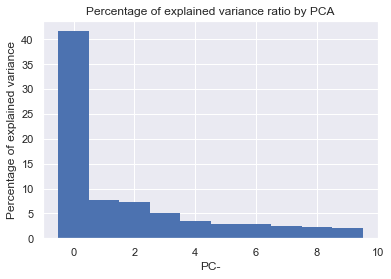

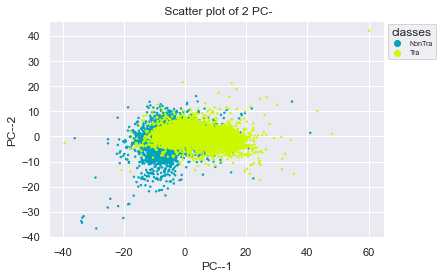

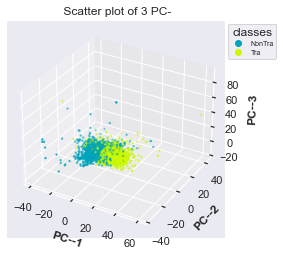

<Figure size 432x288 with 0 Axes>

In [4]:
from propythia.linear_dim_reduction import FeatureDecomposition
TraPCA = FeatureDecomposition(df_Tra.iloc[:,2:], classes= list(df_Tra.columns[2:]))
TraPCA.run_pca(n_components=10)
TraPCA.pca_bar_plot()
TraPCA.pca_scatter_plot(target=df_Tra.transporter)
TraPCA.pca_scatter_plot3d(target=df_Tra.transporter)

O PCA para o dataset correspondente à classificação binária foi realizado definindo 10 componentes para explicar a variabilidade dos dados. Verificamos que o primeiro componente explica a maioria dos dados, cerca de 41.3%.
Quando verificada a dispersão dos dados verifica-se uma ligeira separação/dispersão entre as classes (transportador ou não transportador). Existem zonas (extremos) em que predominantemente é composto por apenas uma das classe contudo quando mais próximo da *fronteira* entre as duas classes a predominância é perdida, indicando uma correlação entre as classes.

### Fast ICA

Original shape: (30505, 100)
Reduced shape: (30505, 10)
Finished 'run_FICA' in 2.1781 secs


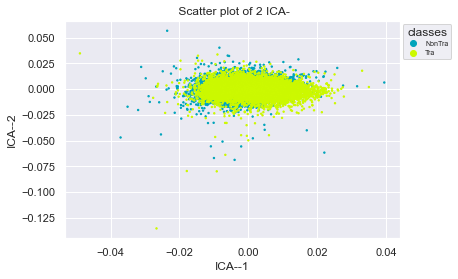

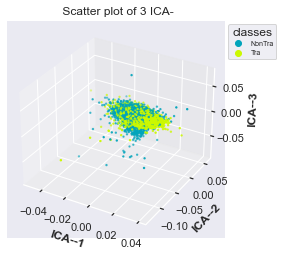

<Figure size 432x288 with 0 Axes>

In [5]:
TraICA = FeatureDecomposition(df_Tra.iloc[:,2:], classes= list(df_Tra.columns[2:]))
TraICA.run_FICA(n_components=10)
TraICA.pca_scatter_plot(target=df_Tra.transporter)
TraICA.pca_scatter_plot3d(target=df_Tra.transporter)

Análisando o Fast ICA obtido, pode-se verificar a ocorrência de um aglomeramento das classes na mesma região dos gráficos, indicando-nos que as classes não são totalmente independentes entre si.

## Classificação multiclasse balanceado
### PCA

Original shape: (18048, 100)
Reduced shape: (18048, 10)
Variance explained by the PC: [0.43657667 0.0929927  0.06464103 0.04523376 0.04396267 0.03167103
 0.02530279 0.02272067 0.02074795 0.01766433]
Number of components: 10
Finished 'run_pca' in 0.1281 secs


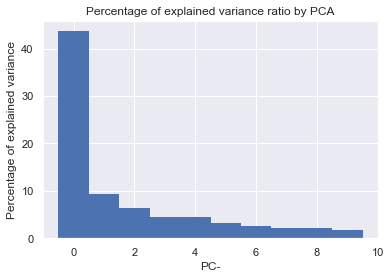

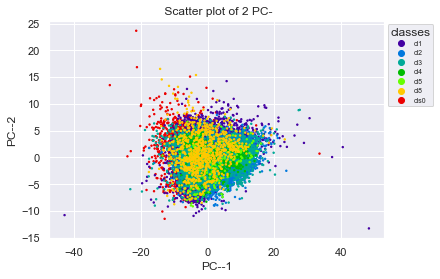

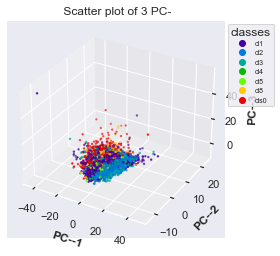

<Figure size 432x288 with 0 Axes>

In [6]:
TCDBPCA_blc = FeatureDecomposition(df_TCDB_blc.iloc[:,2:], classes= list(df_TCDB_blc.columns[2:]))
TCDBPCA_blc.run_pca(n_components=10)
TCDBPCA_blc.pca_bar_plot()
TCDBPCA_blc.pca_scatter_plot(target=df_TCDB_blc.TCDB_ID)
TCDBPCA_blc.pca_scatter_plot3d(target=df_TCDB_blc.TCDB_ID)

No PCA para o dataset correspondente à classificação multiclasse balanceado foi definido o mesmo número de componentes que na análise anterior. Verificou-se que a percentagem explicativa da variabilidade do primeiro componente explica cerca de 44%. No entanto, quando analisados os gráficos de dispersão não é possível distinguir as diferentes classes, uma vez que os dados se encontram aglomerados na mesma região.

### Fast ICA

Original shape: (18048, 100)
Reduced shape: (18048, 10)
Finished 'run_FICA' in 0.7517 secs


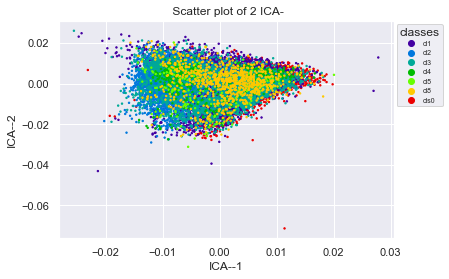

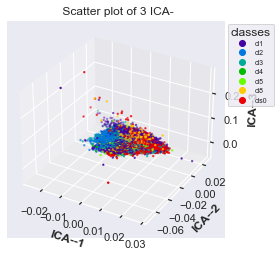

<Figure size 432x288 with 0 Axes>

In [7]:
TCDBICA_blc = FeatureDecomposition(df_TCDB_blc.iloc[:,2:], classes= list(df_TCDB_blc.columns[2:]))
TCDBICA_blc.run_FICA(n_components=10)
TCDBICA_blc.pca_scatter_plot(target=df_TCDB_blc.TCDB_ID)
TCDBICA_blc.pca_scatter_plot3d(target=df_TCDB_blc.TCDB_ID)

Na análise FastICA ao dataset balanceado registou-se também uma fraca separação das diferentes classes. Em ambos os gráficos, as componentes do ICA não permitem a distinção entre as diferentes classes, não se verificando a independência estatística entre as diferentes classes.

## Classificação multiclasse de transportadores
### PCA

Original shape: (14048, 100)
Reduced shape: (14048, 10)
Variance explained by the PC: [0.40398821 0.12076009 0.07233224 0.04266625 0.03414875 0.03020945
 0.02752532 0.0249099  0.02170909 0.01983084]
Number of components: 10
Finished 'run_pca' in 0.0904 secs


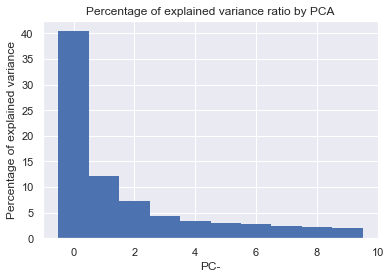

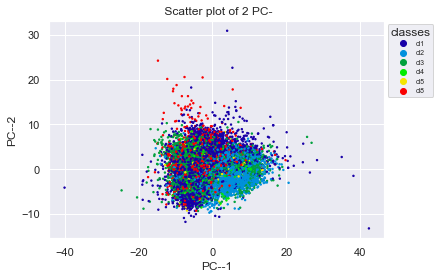

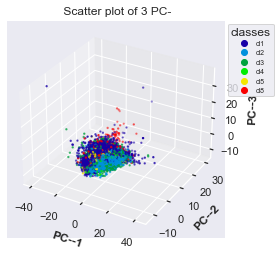

<Figure size 432x288 with 0 Axes>

In [8]:
TCDBPCA_nz = FeatureDecomposition(df_TCDB_nz.iloc[:,2:], classes= list(df_TCDB_nz.columns[2:]))
TCDBPCA_nz.run_pca(n_components=10)
TCDBPCA_nz.pca_bar_plot()
TCDBPCA_nz.pca_scatter_plot(target=df_TCDB_nz.TCDB_ID)
TCDBPCA_nz.pca_scatter_plot3d(target=df_TCDB_nz.TCDB_ID)

À semelhança do resultado anterior registamos que o primeiro componente principal determinado pelo PCA explica 40% da variância dos dados. Pelas análises dos gráficos de dispersão, novamente, não é possível registar a individualização dos componentes de PCA, mostrando que as classes poderão estar correlacionadas, semelhante ao ocorrido anteriormente.

#### Fast ICA

Original shape: (14048, 100)
Reduced shape: (14048, 10)
Finished 'run_FICA' in 0.7602 secs


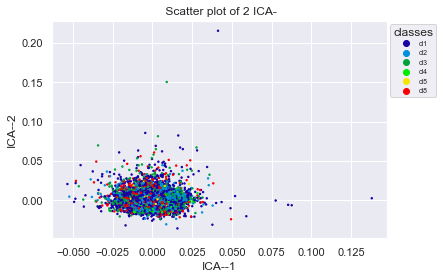

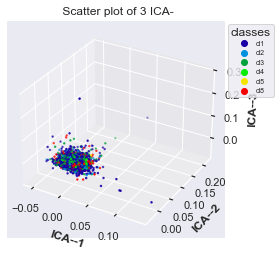

<Figure size 432x288 with 0 Axes>

In [9]:
TCDBICA_nz = FeatureDecomposition(df_TCDB_nz.iloc[:,2:], classes= list(df_TCDB_nz.columns[2:]))
TCDBICA_nz.run_FICA(n_components=10)
TCDBICA_nz.pca_scatter_plot(target=df_TCDB_nz.TCDB_ID)
TCDBICA_nz.pca_scatter_plot3d(target=df_TCDB_nz.TCDB_ID)

Na análise FastICA ao df_TCBL_nz quando comparados com as diferentes classes o comportamento registado entre as classes mantêm-se, ou seja, as classes apresentam aglomeradas no gráfico, indicando a não independência estatística entre as classes.

----
# Clustering
## KMeans
Clustering é uma técnica não supervisionada que permite agrupar os dados em clusters consoante as características semelhantes entre eles. K-means foi uma técnica de clustering utilizada para análise, para tal recorreu-se o módulo Cluster do package ProPythia.
K-means divide os dados em clusters, em que cada amostra está no cluster com a média mais próxima e variância semelhante. A função objetivo é encontrar centroides que minimizem a distância entre as amostras e os centroides.

O clustering foi realizado utilizando as 100 features selecionadas. No entanto, como será demostrado posteriormente os resultados obtidos não foram os melhores. De modo a tentar melhorar o processo de clustering foram utilizados os principais componentes resultantes do processo de PCA realizado anteriormente.

Para cada caso, o primeiro gráfico apresentado representa a distribuição hipotética das classes segundo os centroides dos cluster, já o segundo gráfico representa a Distribuição real das classes com o inserção dos centroides calculados no processo do K-means.

Esta é uma técnica simples e popular para machine learning não supervisionado, que irá ser usada para procurar características semelhantes na classificação de classes de proteínas transportadores, tendo em conta as 100 features que melhor explicam os datasets. Também será aplicada a mesma técnica para os datasets com as componentes PCA gerados anteriormente.

### Classificação binária segundo as features

transporter  NonTra   Tra
clusters                 
0             16185  7230
1               272  6818


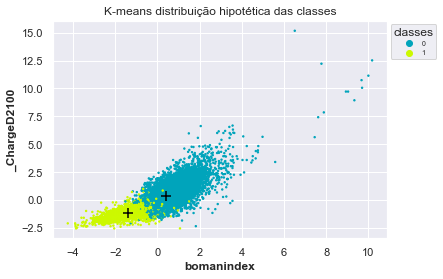

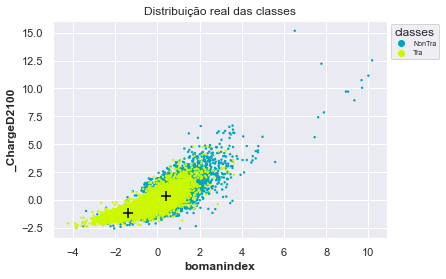

<Figure size 432x288 with 0 Axes>

In [10]:
from propythia.clustering import Cluster
from Util import kmeans2D
TraClus = Cluster(df_Tra.iloc[:,2:], target=df_Tra.transporter)
TraClus.run_kmeans(random_state=42,max_iter=1000)
print(TraClus.kmeans_table())
label = pd.DataFrame(TraClus.y_kmeans)

kmeans2D(df_Tra.iloc[:,2:],label.iloc[:,0],TraClus.centroids,'K-means distribuição hipotética das classes', labelx = df_Tra.columns[2], labely= df_Tra.columns[3])
kmeans2D(df_Tra.iloc[:,2:],df_Tra.transporter,TraClus.centroids,'Distribuição real das classes', labelx = df_Tra.columns[2] , labely= df_Tra.columns[3])

Através da matriz de confusão é possível verificar que existe uma distribuição das classes entre os clusters, implicando uma classificação fraca de transportadores e não transportadores. Sendo atribuido a um dos clusters a maioria dos pontos, concentrando os pontos da classe não transportador e uma porção da classe transportador.

Através do segundo gráfico podemos explicar o comportamento retratado na matriz de confusão, uma vez que, os centroides estão rodeados de ambas as classes, não havendo uma separação clara entre os pontos de cada classe.

### Classificação binária segundo os Principal Components

In [11]:
PCA_Tra = pd.DataFrame(TraPCA.x_pca)
PCA_Tra.insert(len(PCA_Tra.columns),'Label',list(df_Tra.transporter))
PCA_Tra.iloc[:3,:]

,0,1,2,3,4,5,6,7,8,9,Label
0,-1.061392,-1.650129,10.921699,-0.489775,0.552430,-3.777743,-0.733818,1.860350,1.321786,0.229879,NonTra
1,-7.111783,1.329905,-1.810126,1.331972,1.573214,1.067784,0.397037,-0.056523,-0.998074,0.027488,NonTra
2,-2.283928,0.378241,3.584413,2.499967,1.092899,-0.132658,-3.028469,-0.063587,1.058898,2.226391,NonTra


Label     NonTra   Tra
clusters              
0            279  6826
1          16178  7222


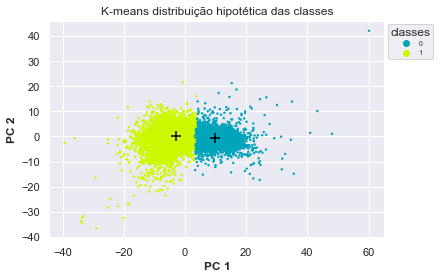

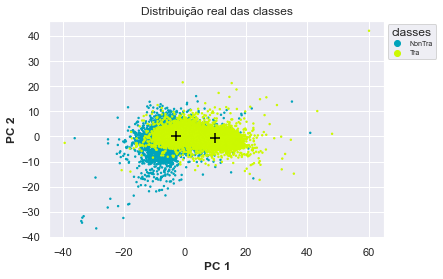

<Figure size 432x288 with 0 Axes>

In [12]:
TraPcaClus = Cluster(PCA_Tra.iloc[:,:-1], target=PCA_Tra.Label)
TraPcaClus.run_kmeans(random_state=42,max_iter=1000)
print(TraPcaClus.kmeans_table())
label = pd.DataFrame(TraPcaClus.y_kmeans)

kmeans2D(PCA_Tra.iloc[:,:-1],label.iloc[:,0],TraPcaClus.centroids,'K-means distribuição hipotética das classes', labelx = 'PC 1', labely = 'PC 2')
kmeans2D(PCA_Tra.iloc[:,:-1],PCA_Tra.Label,TraPcaClus.centroids,'Distribuição real das classes', labelx = 'PC 1', labely = 'PC 2')

A utilização dos componentes do PCA em comparação com a classificação anterior não apresenta melhorias significativas, não havendo uma separação entre os pontos das duas classes. Novamenta, na matriz de confusão a classe 'Não Transportadores" encontra-se concetrada em um dos cluster (quase a totalidade), no entanto para a classe 'Transportador' existe a dispersão pelos 2 clusters.

### Classificação multiclasse balanceado segundo as features

TCDB_ID    cl1   cl2   cl3  cl4  cl5  cl8  cls0
clusters                                       
0          376  1848   529  121   41   92     0
1          874   194   217   41   12  234   150
2          442  1434   705   83   44   50    13
3          979   185   616   49   34  108   461
4         1143   268   609   19   42  165   886
5          646    80  1057   94   24  157  1849
6          171    17   169    2    5   72   641


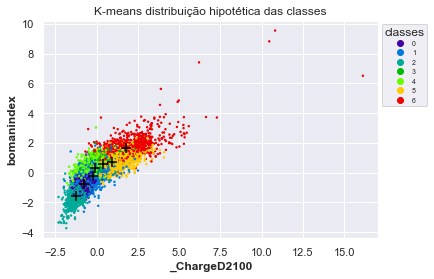

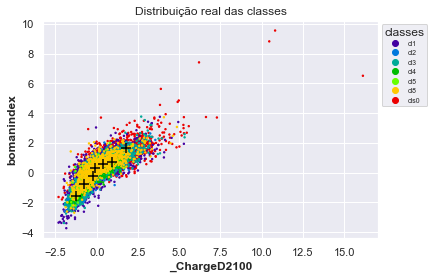

<Figure size 432x288 with 0 Axes>

In [13]:
TCDBClus_blc = Cluster(df_TCDB_blc.iloc[:,2:], target=df_TCDB_blc.TCDB_ID)
TCDBClus_blc.run_kmeans(random_state=42,max_iter=1000)
print(TCDBClus_blc.kmeans_table())
label = pd.DataFrame(TCDBClus_blc.y_kmeans)

kmeans2D(df_TCDB_blc.iloc[:,2:],label.iloc[:,0],TCDBClus_blc.centroids,'K-means distribuição hipotética das classes', labelx = df_TCDB_blc.columns[2] , labely= df_TCDB_blc.columns[3])
kmeans2D(df_TCDB_blc.iloc[:,2:],df_TCDB_blc.TCDB_ID,TCDBClus_blc.centroids,'Distribuição real das classes', labelx = df_TCDB_blc.columns[2] , labely= df_TCDB_blc.columns[3])

Após a analise para a classificação multiclasse considerando o balanceamento do número de sequências por classe, a matriz de confusão regista uma distribuição das classes entre os vários clusters, não sendo possível associar a classificação das classes a cluster específicos. O segundo gráfico demonstra, à semelhança do que é identificado pela matriz de confusão, que os clusters não isolam os pontos de uma classe, ou seja, não verifica a separação dos clusters em cada classe como representado no primeiro gráfico.

### Classificação multiclasse balanceado segundo os Principal Components

In [14]:
PCA_TCDB_blc = pd.DataFrame(TCDBPCA_blc.x_pca)
PCA_TCDB_blc.insert(len(PCA_TCDB_blc.columns),'transporter',list(df_TCDB_blc.TCDB_ID))
PCA_TCDB_blc.iloc[:3,:]

,0,1,2,3,4,5,6,7,8,9,transporter
0,-8.223866,2.449847,-0.150537,-1.366517,1.528237,0.339396,-1.232843,-0.289452,-0.236503,1.163639,cls0
1,-4.815181,1.601604,-1.119418,-2.210892,-1.394289,-0.184981,-0.248867,0.683435,0.211152,-1.387712,cls0
2,-1.911822,-3.621715,-2.399651,-0.502318,-2.848112,-1.872001,-0.965433,1.005099,0.640544,1.021606,cls0


transporter   cl1   cl2   cl3  cl4  cl5  cl8  cls0
clusters                                          
0             979   186   617   51   31  109   457
1             444  1429   706   82   44   52    14
2            1096   254   555   15   43  160   828
3             680    90  1104   96   26  159  1904
4             878   198   225   44   12  232   152
5             380  1852   523  119   41   93     0
6             174    17   172    2    5   73   645


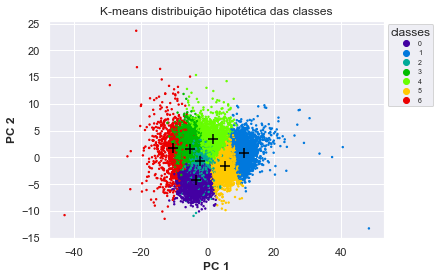

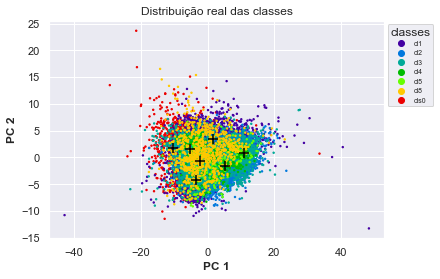

<Figure size 432x288 with 0 Axes>

In [15]:
TCDBPcaClus_blc = Cluster(PCA_TCDB_blc.iloc[:,:-1], target=PCA_TCDB_blc.transporter)
TCDBPcaClus_blc.run_kmeans(random_state=42,max_iter=1000)
print(TCDBPcaClus_blc.kmeans_table())
label = pd.DataFrame(TCDBPcaClus_blc.y_kmeans)

kmeans2D(PCA_TCDB_blc.iloc[:,:-1],label.iloc[:,0],TCDBPcaClus_blc.centroids,'K-means distribuição hipotética das classes', labelx = 'PC 1', labely = 'PC 2')
kmeans2D(PCA_TCDB_blc.iloc[:,:-1],PCA_TCDB_blc.transporter,TCDBPcaClus_blc.centroids,'Distribuição real das classes', labelx = 'PC 1', labely = 'PC 2')

Com a utilização dos principais componentes provenientes do PCA, a matriz de confusão apresenta um comportamento muito semelhante relativamente a distribuição dos pontos das classes pelos clusters. O gráfico 2 indica-nos o comportamente já registado anteriormente, os pontos de várias classes encontram-se agregados no mesmo cluster, não havendo uma separação das classes por cluster.

### Classificação multiclasse de transportadores segundo as features

TCDB_ID    cl1   cl2   cl3  cl4  cl5  cl8
clusters                                 
0         1354   282   738   30   44  198
1          689    57   123   22    7  212
2          691    98  1089   81   28  181
3          896   158   578   42   31  105
4          432  1662   502  128   42  103
5          569  1769   872  106   50   79


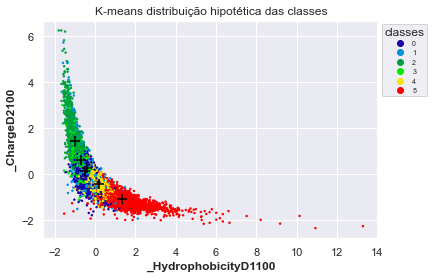

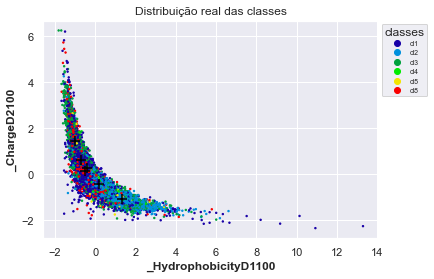

<Figure size 432x288 with 0 Axes>

In [16]:
TCDBClus_nz = Cluster(df_TCDB_nz.iloc[:,2:], target=df_TCDB_nz.TCDB_ID)
TCDBClus_nz.run_kmeans(random_state=42,max_iter=1000)
print(TCDBClus_nz.kmeans_table())
label = pd.DataFrame(TCDBClus_nz.y_kmeans)

kmeans2D(df_TCDB_nz.iloc[:,2:],label.iloc[:,0],TCDBClus_nz.centroids,'K-means distribuição hipotética das classes',labelx = df_TCDB_nz.columns[2] , labely= df_TCDB_nz.columns[3])
kmeans2D(df_TCDB_nz.iloc[:,2:],df_TCDB_nz.TCDB_ID,TCDBClus_nz.centroids,'Distribuição real das classes',labelx = df_TCDB_nz.columns[2] , labely= df_TCDB_nz.columns[3])

A análise para a classificação multiclasse não sendo considerada a classe 0 (não transportador), à semelhança das análises anteriores, a matriz de confusão regista uma distribuição dos pontos de cada classe por vários clusters, não sendo possível uma classificação confiável para as classes. Observando ambos os gráficos gerados, verifica-se também uma diferença entre os hipotéticos clusters previstos e os 'reais', observando que os centróides dos clusters previstos não têm semelhanças com os 'reais' suportando assim a distribuição aleatória na matriz de confusão.

### Classificação multiclasse de transportadores segundo os Principal Components

In [17]:
PCA_TCDB_nz = pd.DataFrame(TCDBPCA_nz.x_pca)
PCA_TCDB_nz.insert(len(PCA_TCDB_nz.columns),'Label',list(df_TCDB_nz.TCDB_ID))
PCA_TCDB_nz.iloc[:3,:]

,0,1,2,3,4,5,6,7,8,9,Label
0,7.240980,1.451692,-0.023545,-0.891552,0.192731,-0.353569,1.020908,-0.103420,0.024471,-0.419492,cl4
1,-0.199683,-0.590796,2.413175,0.079937,-0.767561,-0.525935,0.937014,-1.508999,0.187446,0.782493,cl2
2,-4.315041,0.254526,0.692754,-1.767301,-0.912159,-0.138339,-0.237984,1.916830,-2.348899,-0.684957,cl2


Label      cl1   cl2   cl3  cl4  cl5  cl8
clusters                                 
0          411  1641   490  125   41   92
1          572  1783   882  107   50   81
2          700    66   131   24    8  216
3         1330   274   693   25   44  194
4          729   104  1124   85   27  189
5          889   158   582   43   32  106


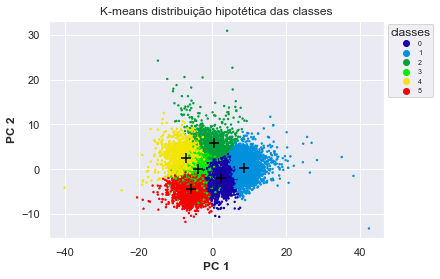

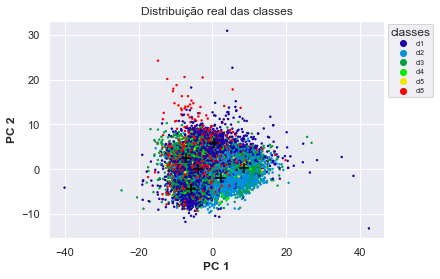

<Figure size 432x288 with 0 Axes>

In [18]:
TCDBPcaClus_nz = Cluster(PCA_TCDB_nz.iloc[:,:-1], target=PCA_TCDB_nz.Label)
TCDBPcaClus_nz.run_kmeans(random_state=42,max_iter=1000)
print(TCDBPcaClus_nz.kmeans_table())
label = pd.DataFrame(TCDBPcaClus_nz.y_kmeans)

kmeans2D(PCA_TCDB_nz.iloc[:,:-1],label.iloc[:,0],TCDBPcaClus_nz.centroids,'K-means distribuição hipotética das classes', labelx = 'PC 1', labely = 'PC 2')
kmeans2D(PCA_TCDB_nz.iloc[:,:-1],PCA_TCDB_nz.Label,TCDBPcaClus_nz.centroids,'Distribuição real das classes', labelx = 'PC 1', labely = 'PC 2')

Após a análise para a classificação multiclasse, onde não foi considerada a classe 0, e considerando os componentes principais provindos do PCA. Em conformidade das análises anteriores, a matriz de confusão regista uma distribuição dos pontos de cada classe por vários clusters, não sendo possível isolar as classes em clusters segundo os componentes principais. Observando ambos os gráficos gerados, verifica-se, novamente, a diferença entre os clusters previstos pelo kmeans e a distribuição dos pontos das classes, suportando a distribuição verificada na matriz de confusão.


------
## Cluster Hierartico
O cluster hierárquico é um algoritmo de unsupervised machine learning que resulta numa estrutura de clusters agrupada de um modo relacional. Isto é, clusters diferentes são agrupados e organizados pela relação de similaridade global que possuem entre si.
	Esta técnica de clustering divide-se em dois tipos: Cluster Hierárquico Aglomerativo e divisivo. Onde cada um dos tipos define a metodologia utilizada para determinar a hierarquia dos clusters.
No Cluster Hierárquico aglomerativo cada observação começa no seu único cluster e através de um processo iterativo, grupos de clusters similares são associados e combinados com recurso a uma função de determinação de distância entre os mesmos. Este processo continuará até que todas as observações estejam associadas ou uma condição pré-determinada é atingida.
Já, se este método de agrupamento acontecer ao contrário, isto é, a partir da divisão de um único cluster que inclui todas as observações do dataset, em grupos de clusters similares, temos um Cluster Hierárquico Divisivo.


Para uma das análises realizadas nesta etapa, o grupo optou pela utilização de um Cluster Hierárquico aglomerativo, com o objetivo de perceber a associação das diferentes classificações presentes nos vários dataset. Para a determinação de distância entre observações foi utilizada a função euclidean, considerando que os dados relativos às features são valores numéricos decimais e esta métrica é adequada para trabalhar com este tipo de valores. A distância entre os clusters foi determinada com recurso ao método Ward, uma vez que muitos dos métodos de linkage têm o problemas associados a clusters de elevadas dimensões e não muito correlacionados, considerando a instabilidade das análises anteriores vamos usar o método Ward porque é um metodo de linkage que é menos susceptivel a outliers e dados incorretos e em muitos casos é o método que permite um melhor clustering hierárquicos.
	Este algoritmo encontra-se no package propythia, na classe Cluster, na função run_hierarchical_dendogram.

Ao realizar esta técnica de clustering procuramos ver que tipo de estrutura relacional existe entre os diferentes clusters gerados. E, se possível, verificar se os diferentes clusters se organizam pelas diferentes classes de proteínas transportadoras.

<Figure size 432x288 with 0 Axes>

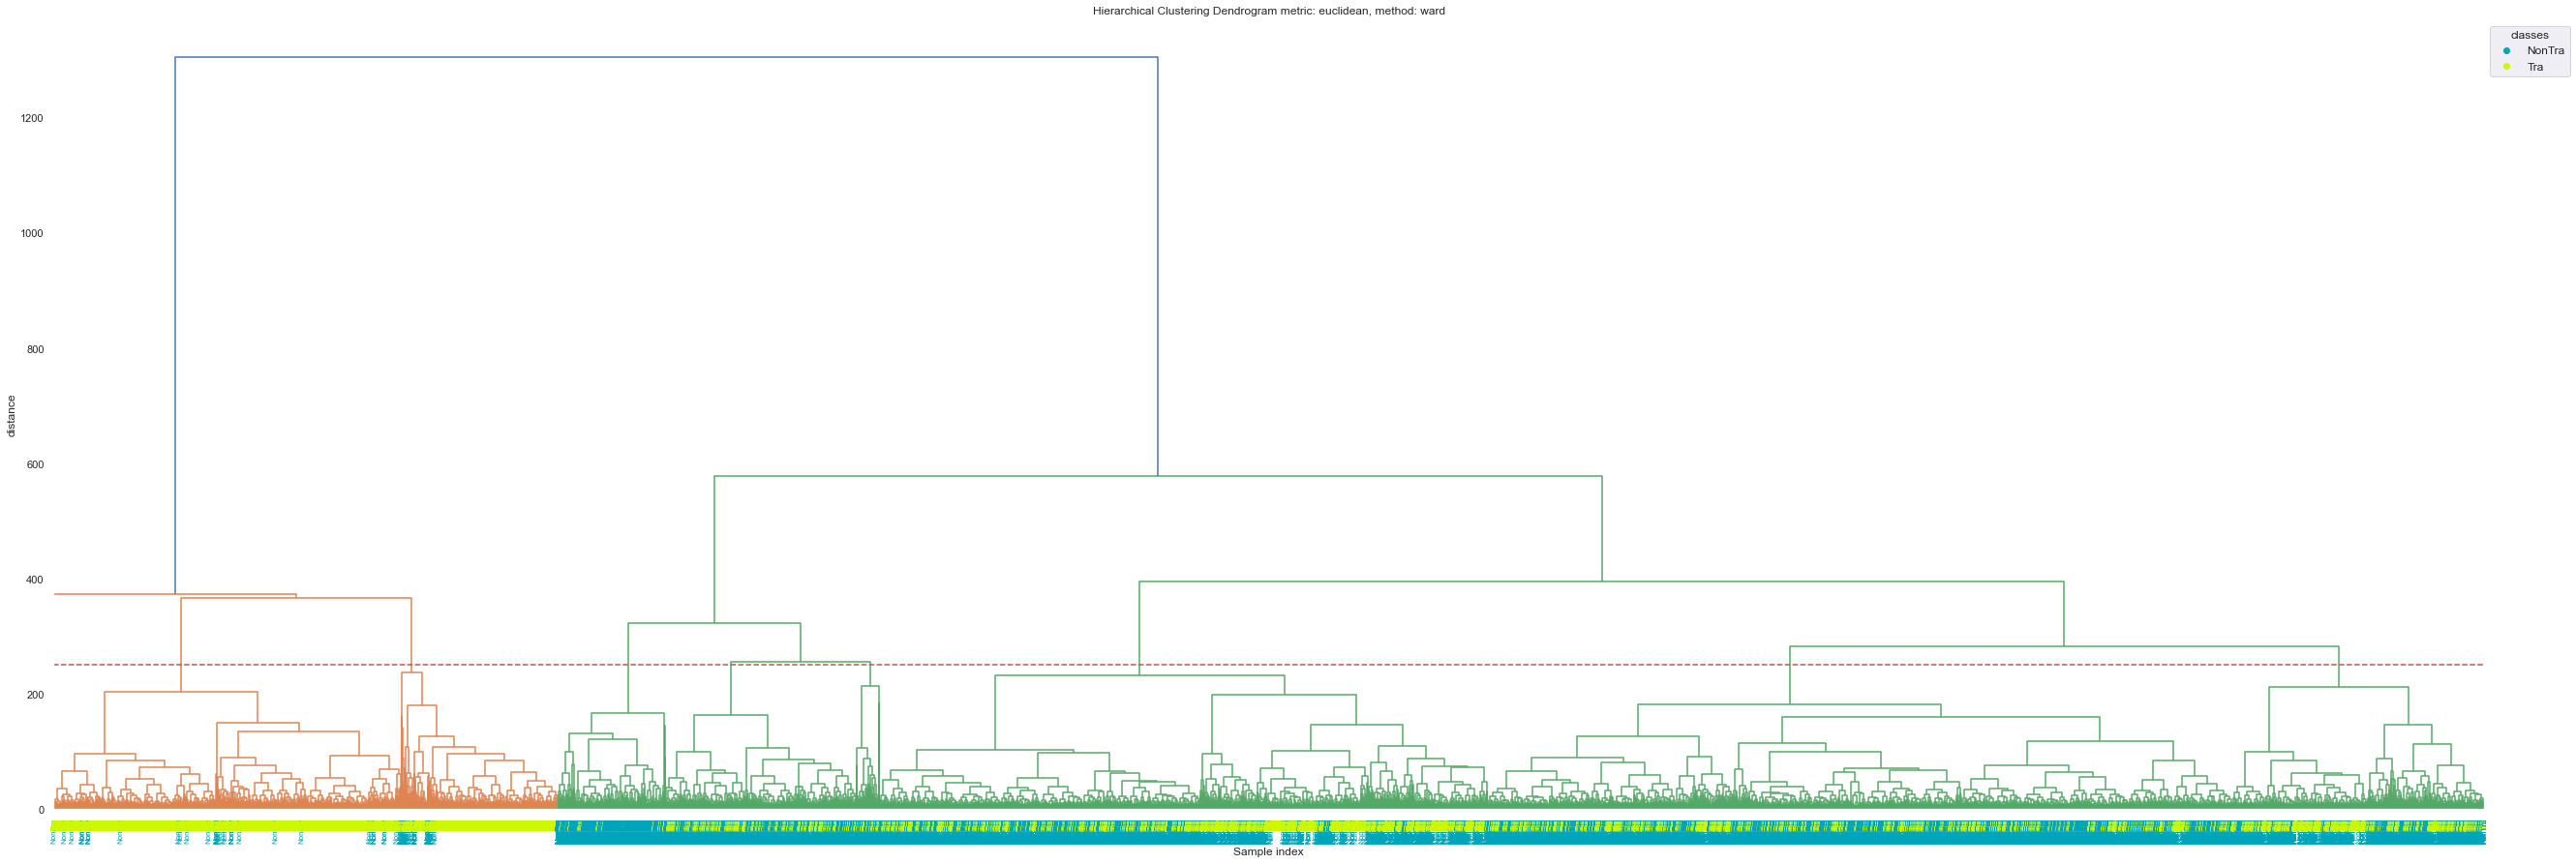

Finished 'hierarchical_dendogram' in 1027.1956 secs


array([[1.18480000e+04, 1.53200000e+04, 1.85135872e-02, 2.00000000e+00],
       [6.00900000e+03, 1.60530000e+04, 1.96881670e-02, 2.00000000e+00],
       [1.06600000e+03, 9.30800000e+03, 2.00051855e-02, 2.00000000e+00],
       ...,
       [6.09990000e+04, 6.10020000e+04, 3.95544319e+02, 2.01400000e+04],
       [6.10030000e+04, 6.10060000e+04, 5.77904882e+02, 2.41720000e+04],
       [6.10050000e+04, 6.10070000e+04, 1.30477292e+03, 3.05050000e+04]])

<Figure size 432x288 with 0 Axes>

In [19]:
TraHier = Cluster(df_Tra.iloc[:,2:], target=df_Tra.transporter)
TraHier.hierarchical_dendogram(truncate_mode= None, metric='euclidean', method='ward')

Com a análise do dendrograma registamos que existe um conjunto de dados que aparentam estar agrupados para um dos classificadores (classe transportador), já o outro classificador (classe não transportadores) os dados apresentam-se sobrepostos com amostras de transportadores. Esta situação foi recorrente ao longo do trabalho, quase a totalidade dos transportadores e parte dos não transportadore ficam associados ao mesmo cluster, sendo associado ao segundo cluster a restantes porção de transportadores e os riúdo dos não transportadores.

<Figure size 432x288 with 0 Axes>

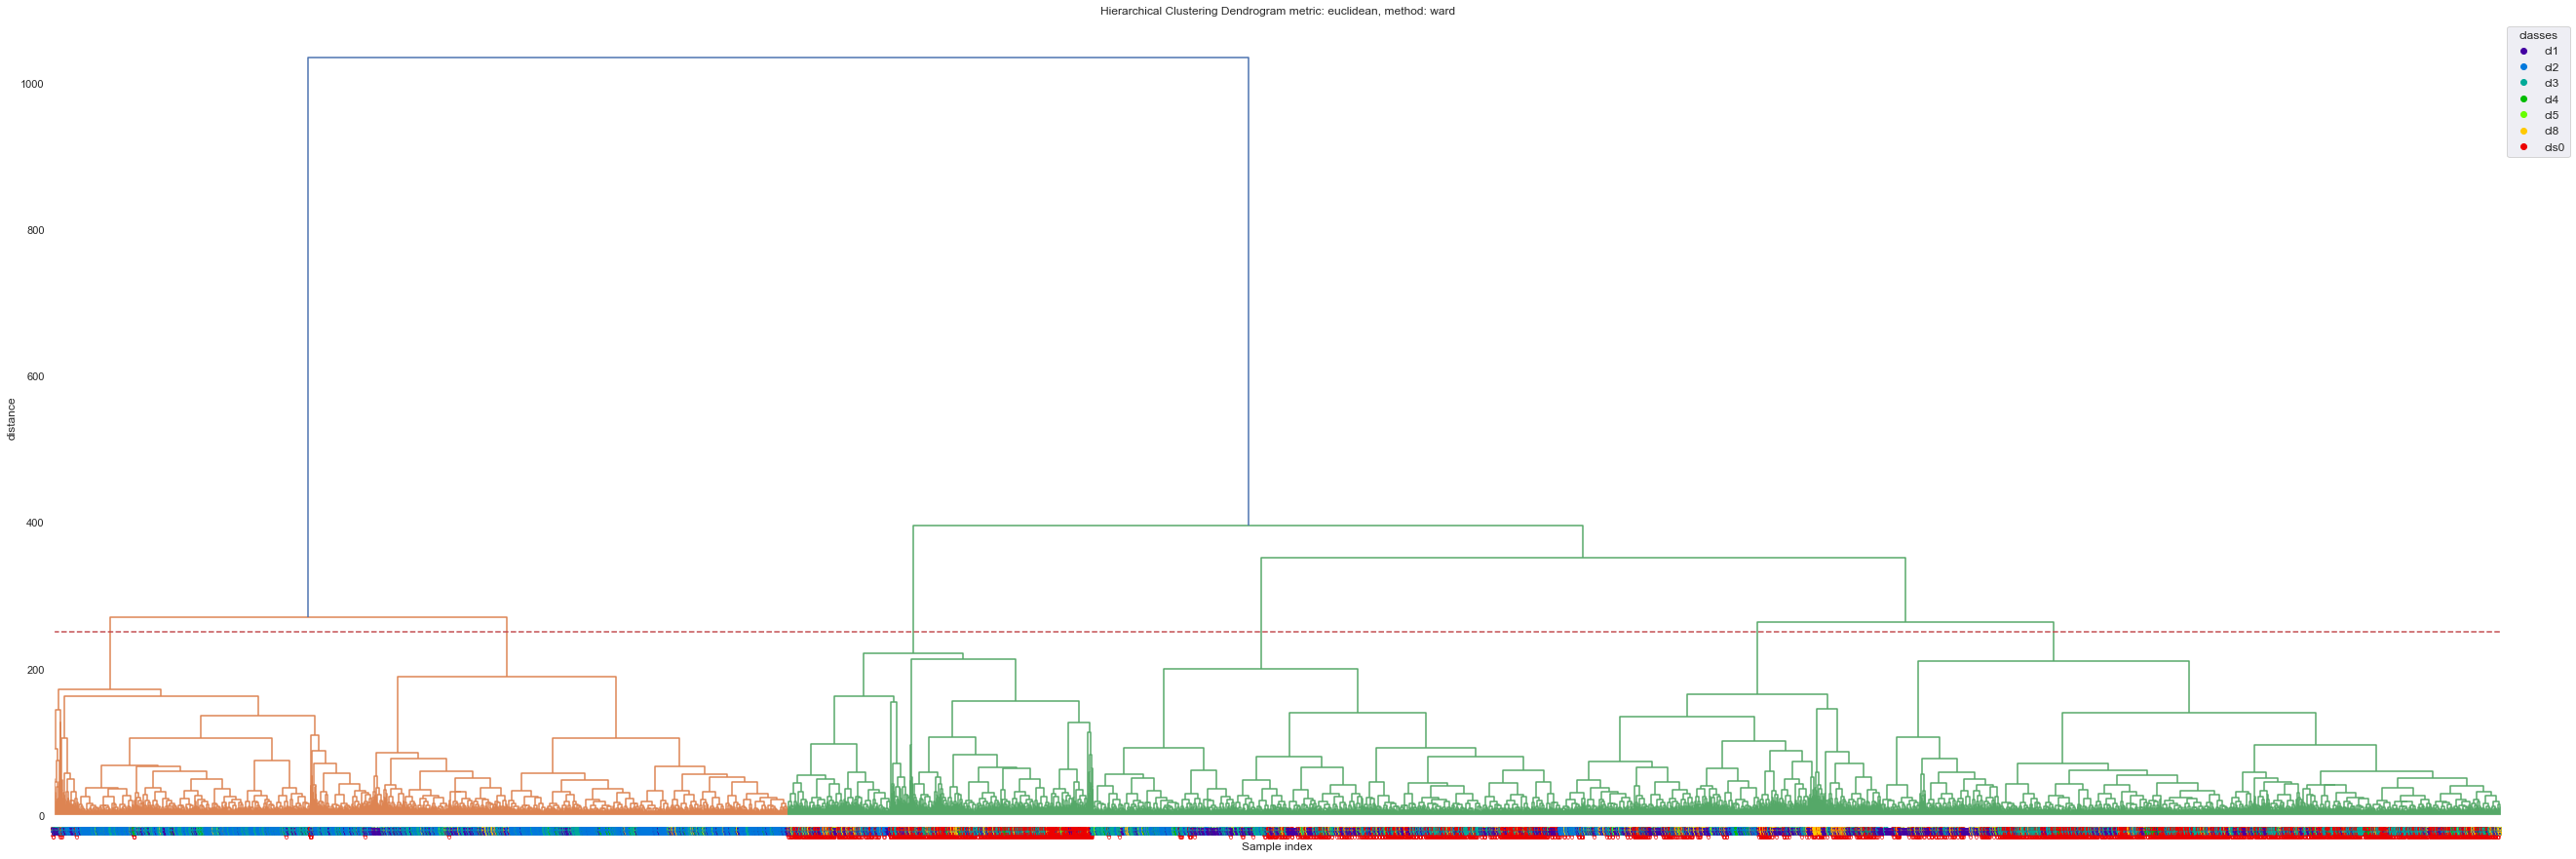

Finished 'hierarchical_dendogram' in 522.8361 secs


array([[7.52500000e+03, 7.97600000e+03, 5.84309692e-02, 2.00000000e+00],
       [1.43610000e+04, 1.44100000e+04, 7.03579957e-02, 2.00000000e+00],
       [6.92600000e+03, 6.92800000e+03, 7.97598590e-02, 2.00000000e+00],
       ...,
       [3.60860000e+04, 3.60900000e+04, 3.51928828e+02, 1.03870000e+04],
       [3.60890000e+04, 3.60920000e+04, 3.96218594e+02, 1.26300000e+04],
       [3.60910000e+04, 3.60930000e+04, 1.03482591e+03, 1.80480000e+04]])

<Figure size 432x288 with 0 Axes>

In [20]:
TCDBHier_blc = Cluster(df_TCDB_blc.iloc[:,2:], target=df_TCDB_blc.TCDB_ID)
TCDBHier_blc.hierarchical_dendogram(truncate_mode= None, metric='euclidean', method='ward')

Ao realizar a análise de cluster hierárquico do dataset multivariado balanceado obtivemos um dendrograma com falta de individualização das diferentes classes de transportadores. As classes não se encontram agrupadas isoladamente, o que reflete a dificuldade do algoritmo em separar as classe de transportadores usando as features introduzidas, como foi recorrente sobre as análises deste dataset.


<Figure size 432x288 with 0 Axes>

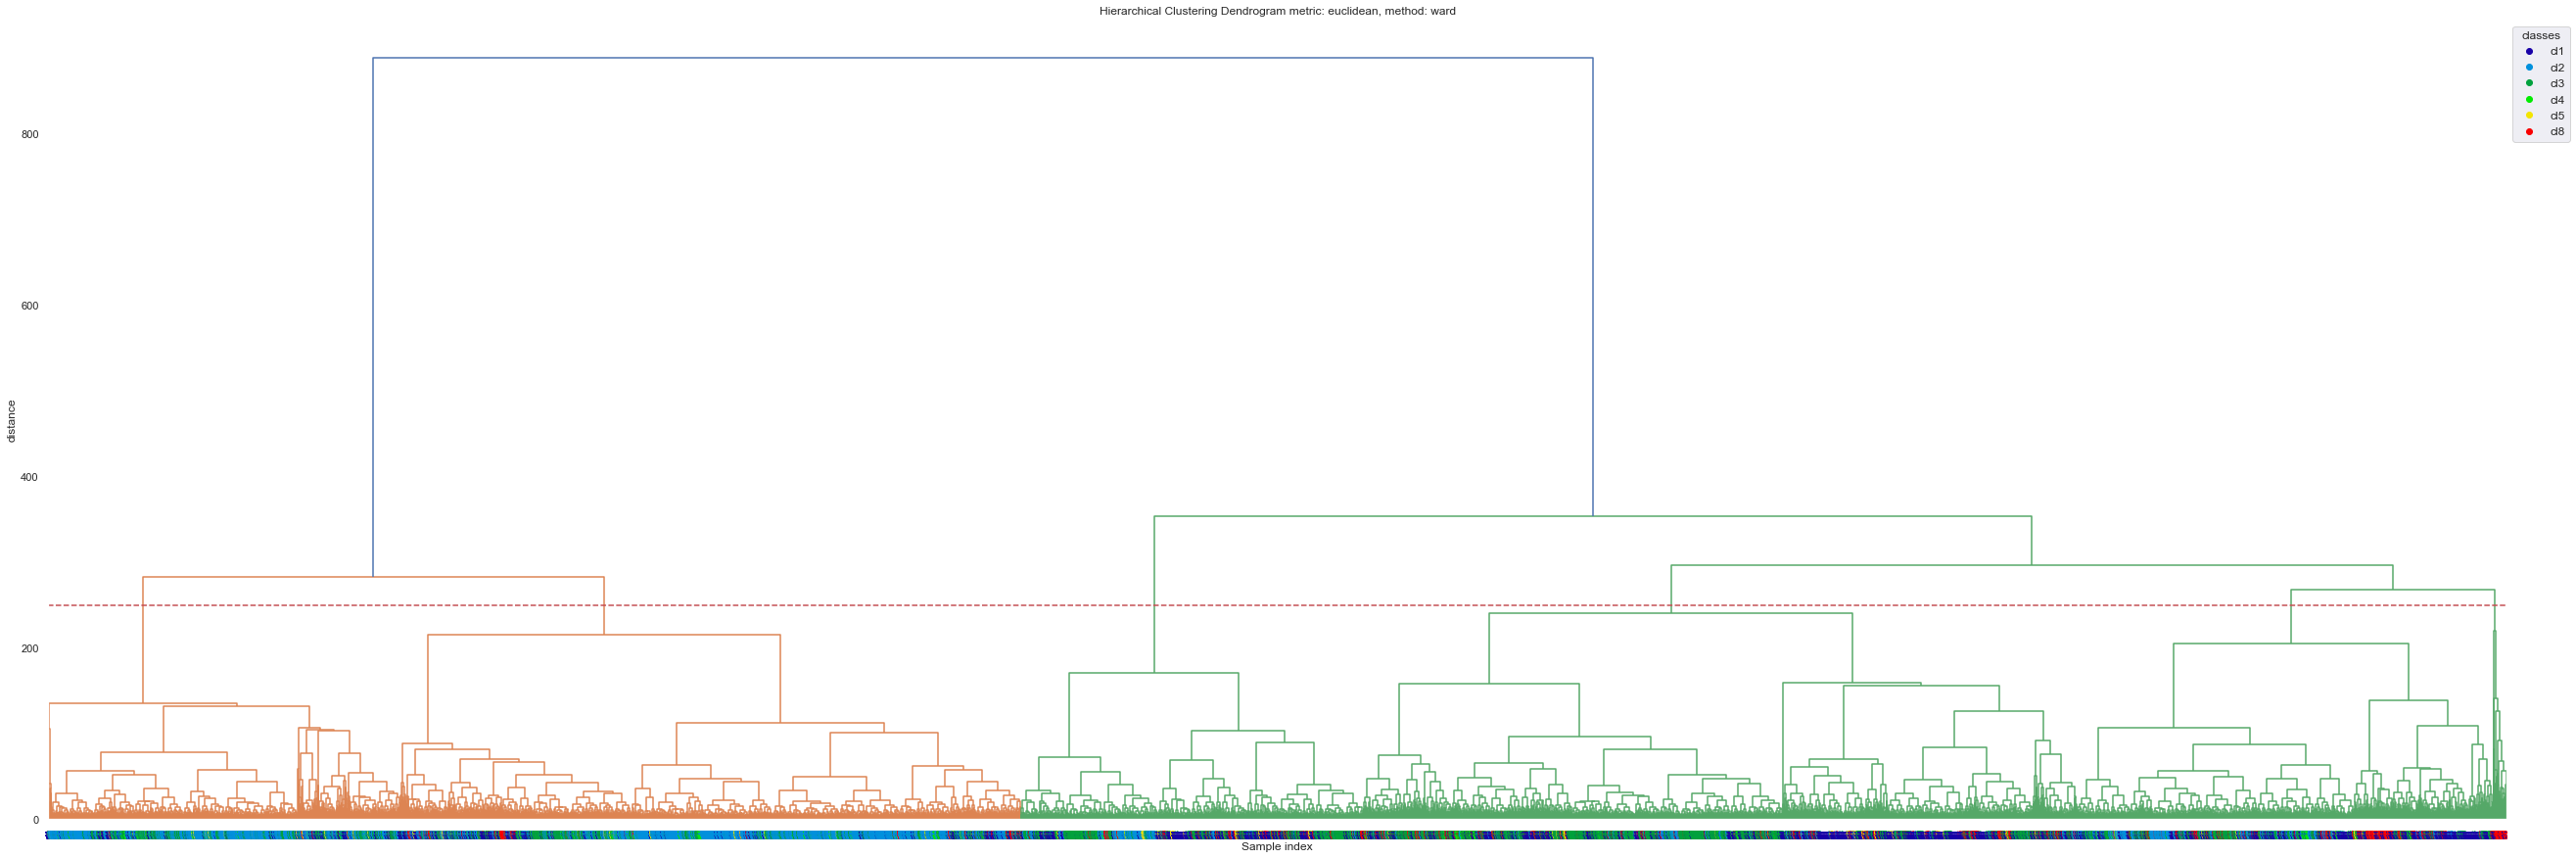

Finished 'hierarchical_dendogram' in 458.6301 secs


array([[9.63200000e+03, 1.15020000e+04, 5.98638591e-02, 2.00000000e+00],
       [6.87100000e+03, 7.09200000e+03, 7.37789996e-02, 2.00000000e+00],
       [4.56000000e+03, 1.02190000e+04, 7.91539279e-02, 2.00000000e+00],
       ...,
       [2.80890000e+04, 2.80900000e+04, 2.96301121e+02, 6.53200000e+03],
       [2.80850000e+04, 2.80920000e+04, 3.54160224e+02, 8.49000000e+03],
       [2.80910000e+04, 2.80930000e+04, 8.88493908e+02, 1.40480000e+04]])

<Figure size 432x288 with 0 Axes>

In [21]:
TCDBHier_nz = Cluster(df_TCDB_nz.iloc[:,2:], target=df_TCDB_nz.TCDB_ID)
TCDBHier_nz.hierarchical_dendogram(truncate_mode= None, metric='euclidean', method='ward')

A análise realizada ao cluster hierárquico do dataset multivariado sem a classe dos não transportadores (classe 0) resultou num dendrograma que não distingue as diferentes classes de proteínas transportadoras através das features utilizadas.

# Resumindo
Em suma, as diferentes análises provaram obter resultados inconclusivos.
Pelas reduções aplicadas pelo PCA, as componentes obtidas não apresentavam independência entre si, não sendo suficientemente relevantes para distinguir as diferentes classes de proteínas transportadoras.
Na aplicação das técnicas de clustering pelo Kmeans, com as features relativas às propriedades físico-químicas, verificou-se, num cenário de aprendizagem não supervisionada, que os dados utilizados não estão aptos para individualizar e caracterizar cada uma das classes de transportadores. Este facto é mais notório nas análises de cluster hierático onde se verificou a mesma dificuldade.
